<a href="https://colab.research.google.com/github/tricycle88/Military-expenditure-1960-2018/blob/master/Military.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# import this libraryies just for practice, u dont need all of them
import numpy as np # used for handling numbers
import pandas as pd # used for handling the dataset
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
%matplotlib inline
import seaborn as sns #data visualization library
from sklearn.model_selection import train_test_split # used for splitting training and testing data
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis #LDA
from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer # used for handling missing data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder # used for encoding categorical data
from sklearn.preprocessing import StandardScaler # used for feature scaling
#@title Import modules
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


In [194]:
# Nakon sto na google drive-u kreiramo folder data, preko ovih komandi mauntujemo zeljeni folder
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [195]:
# Ucitavamo nas csv fajl i spremamo ga u Pandas dataframe
path = "/content/drive/My Drive/data/Military Expenditure.csv"
df = pd.read_csv(path)
df.head(5)

,Name,Code,Type,Indicator Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Aruba,ABW,Country,Military expenditure (current USD),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,Country,Military expenditure (current USD),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2939585.501,NaN,NaN,3341271.551,3581366.351,4203664.569,5393251.216,6127288.063,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,125111557.5,1.227272e+08,1.313462e+08,2.195802e+08,2.405326e+08,2.518695e+08,2.981469e+08,3.258070e+08,2.385834e+08,2.171941e+08,2.682271e+08,1.995186e+08,1.858783e+08,1.914071e+08,1.980863e+08
2,Angola,AGO,Country,Military expenditure (current USD),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,343271609.1,504712881.9,497359449.2,618891637.1,668493883.3,778628250.6,1.066248e+09,1.146467e+09,1.156494e+09,1.487399e+09,1.469383e+09,1.948559e+09,1.751153e+09,1.031248e+09,7.941388e+08,1.774398e+09,5.949912e+08,2.338437e+08,1.597419e+08,456780475.0,1.702783e+08,1.066589e+09,5.836213e+08,4.042991e+08,438686245.4,6.700212e+08,817533582.2,1.365055e+09,1.970309e+09,2.032433e+09,3.163591e+09,3.311193e+09,3.500795e+09,3.639496e+09,4.144635e+09,6.090752e+09,6.841864e+09,3.608299e+09,2.764055e+09,3.062873e+09,1.983614e+09
3,Albania,ALB,Country,Military expenditure (current USD),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.155966e+07,3.928984e+07,4.964950e+07,5.090752e+07,4.571336e+07,29825492.0,3.363805e+07,4.278421e+07,4.536250e+07,5.323205e+07,58649352.5,7.614288e+07,100922358.4,1.101409e+08,1.409839e+08,1.948403e+08,2.556780e+08,1.827369e+08,1.858932e+08,1.970068e+08,1.832047e+08,1.800155e+08,1.781204e+08,1.323507e+08,1.308532e+08,1.443827e+08,1.804887e+08
4,Andorra,AND,Country,Military expenditure (current USD),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [196]:
df['Type'].value_counts(normalize = True) * 100

Country                           76.515152
Regions Clubbed Economically      12.500000
Semi Autonomous Region             6.818182
Regions Clubbed Geographically     4.166667
Name: Type, dtype: float64

In [197]:
df1 = df.assign(Total = df.sum(axis=1))
df1.head(5)

,Name,Code,Type,Indicator Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,Total
0,Aruba,ABW,Country,Military expenditure (current USD),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00
1,Afghanistan,AFG,Country,Military expenditure (current USD),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2939585.501,NaN,NaN,3341271.551,3581366.351,4203664.569,5393251.216,6127288.063,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,125111557.5,1.227272e+08,1.313462e+08,2.195802e+08,2.405326e+08,2.518695e+08,2.981469e+08,3.258070e+08,2.385834e+08,2.171941e+08,2.682271e+08,1.995186e+08,1.858783e+08,1.914071e+08,1.980863e+08,3.239602e+09
2,Angola,AGO,Country,Military expenditure (current USD),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,343271609.1,504712881.9,497359449.2,618891637.1,668493883.3,778628250.6,1.066248e+09,1.146467e+09,1.156494e+09,1.487399e+09,1.469383e+09,1.948559e+09,1.751153e+09,1.031248e+09,7.941388e+08,1.774398e+09,5.949912e+08,2.338437e+08,1.597419e+08,456780475.0,1.702783e+08,1.066589e+09,5.836213e+08,4.042991e+08,438686245.4,6.700212e+08,817533582.2,1.365055e+09,1.970309e+09,2.032433e+09,3.163591e+09,3.311193e+09,3.500795e+09,3.639496e+09,4.144635e+09,6.090752e+09,6.841864e+09,3.608299e+09,2.764055e+09,3.062873e+09,1.983614e+09,7.011220e+10
3,Albania,ALB,Country,Military expenditure (current USD),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.155966e+07,3.928984e+07,4.964950e+07,5.090752e+07,4.571336e+07,29825492.0,3.363805e+07,4.278421e+07,4.536250e+07,5.323205e+07,58649352.5,7.614288e+07,100922358.4,1.101409e+08,1.409839e+08,1.948403e+08,2.556780e+08,1.827369e+08,1.858932e+08,1.970068e+08,1.832047e+08,1.800155e+08,1.781204e+08,1.323507e+08,1.308532e+08,1.443827e+08,1.804887e+08,3.054373e+09
4,Andorra,AND,Country,Military expenditure (current USD),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00


In [198]:
df1.fillna(0, inplace=True)
df1.head(5)

,Name,Code,Type,Indicator Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,Total
0,Aruba,ABW,Country,Military expenditure (current USD),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,Afghanistan,AFG,Country,Military expenditure (current USD),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2939585.501,0.0,0.0,3341271.551,3581366.351,4203664.569,5393251.216,6127288.063,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,125111557.5,1.227272e+08,1.313462e+08,2.195802e+08,2.405326e+08,2.518695e+08,2.981469e+08,3.258070e+08,2.385834e+08,2.171941e+08,2.682271e+08,1.995186e+08,1.858783e+08,1.914071e+08,1.980863e+08,3.239602e+09
2,Angola,AGO,Country,Military expenditure (current USD),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.000,0.000,0.000,0.000,0.000,343271609.1,504712881.9,497359449.2,618891637.1,668493883.3,778628250.6,1.066248e+09,1.146467e+09,1.156494e+09,1.487399e+09,1.469383e+09,1.948559e+09,1.751153e+09,1.031248e+09,7.941388e+08,1.774398e+09,5.949912e+08,2.338437e+08,1.597419e+08,456780475.0,1.702783e+08,1.066589e+09,5.836213e+08,4.042991e+08,438686245.4,6.700212e+08,817533582.2,1.365055e+09,1.970309e+09,2.032433e+09,3.163591e+09,3.311193e+09,3.500795e+09,3.639496e+09,4.144635e+09,6.090752e+09,6.841864e+09,3.608299e+09,2.764055e+09,3.062873e+09,1.983614e+09,7.011220e+10
3,Albania,ALB,Country,Military expenditure (current USD),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.155966e+07,3.928984e+07,4.964950e+07,5.090752e+07,4.571336e+07,29825492.0,3.363805e+07,4.278421e+07,4.536250e+07,5.323205e+07,58649352.5,7.614288e+07,100922358.4,1.101409e+08,1.409839e+08,1.948403e+08,2.556780e+08,1.827369e+08,1.858932e+08,1.970068e+08,1.832047e+08,1.800155e+08,1.781204e+08,1.323507e+08,1.308532e+08,1.443827e+08,1.804887e+08,3.054373e+09
4,Andorra,AND,Country,Military expenditure (current USD),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [199]:
df1.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,Total
count,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02
mean,1.341317e+09,1.416116e+09,1.592377e+09,1.656510e+09,1.680006e+09,1.744907e+09,2.008475e+09,2.290012e+09,2.423275e+09,2.510910e+09,2.585748e+09,2.613475e+09,2.860280e+09,3.197952e+09,3.692253e+09,4.131218e+09,4.328814e+09,5.068902e+09,5.639755e+09,6.286471e+09,8.581665e+09,9.344868e+09,8.594359e+09,8.440281e+09,1.039649e+10,1.098678e+10,1.209491e+10,1.366735e+10,1.443928e+10,1.665396e+10,1.809104e+10,1.768312e+10,1.850589e+10,1.846860e+10,1.886125e+10,1.967169e+10,1.985878e+10,1.987384e+10,1.934406e+10,1.969005e+10,2.025480e+10,2.062527e+10,2.212985e+10,2.618316e+10,2.976679e+10,3.248937e+10,3.316818e+10,3.733803e+10,4.268827e+10,4.417008e+10,4.669259e+10,5.013965e+10,5.101233e+10,5.189584e+10,5.219732e+10,4.914965e+10,4.896745e+10,5.117007e+10,5.357531e+10,1.125931e+12
std,8.149189e+09,8.607877e+09,9.477017e+09,9.667091e+09,9.677861e+09,9.903256e+09,1.164767e+10,1.346024e+10,1.420388e+10,1.449440e+10,1.461279e+10,1.444556e+10,1.567336e+10,1.703938e+10,1.894686e+10,2.062464e+10,2.127703e+10,2.424274e+10,2.692511e+10,3.022995e+10,4.091288e+10,4.499836e+10,4.365691e+10,4.315536e+10,5.253689e+10,5.643169e+10,6.309028e+10,6.964360e+10,7.335382e+10,7.556599e+10,8.133439e+10,7.893473e+10,8.335799e+10,8.049594e+10,8.075929e+10,8.283876e+10,8.200602e+10,8.081234e+10,7.914639e+10,8.072345e+10,8.262020e+10,8.371998e+10,9.176499e+10,1.074067e+11,1.209359e+11,1.299832e+11,1.353088e+11,1.483078e+11,1.663717e+11,1.725618e+11,1.801850e+11,1.898721e+11,1.890300e+11,1.869235e+11,1.858593e+11,1.756037e+11,1.756914e+11,1.822405e+11,1.922813e+11,4.440489e+12
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e

In [200]:
columns=[str(i) for i in list((range(1960,2019)))]
columns=columns+["Total"]
for i in columns:
    df1[i]=df1[i]/1.e+9
df1=np.round(df1, decimals=2)
df1.head()

,Name,Code,Type,Indicator Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,Total
0,Aruba,ABW,Country,Military expenditure (current USD),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,Afghanistan,AFG,Country,Military expenditure (current USD),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.01,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.13,0.12,0.13,0.22,0.24,0.25,0.30,0.33,0.24,0.22,0.27,0.20,0.19,0.19,0.20,3.24
2,Angola,AGO,Country,Military expenditure (current USD),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.34,0.5,0.5,0.62,0.67,0.78,1.07,1.15,1.16,1.49,1.47,1.95,1.75,1.03,0.79,1.77,0.59,0.23,0.16,0.46,0.17,1.07,0.58,0.40,0.44,0.67,0.82,1.37,1.97,2.03,3.16,3.31,3.50,3.64,4.14,6.09,6.84,3.61,2.76,3.06,1.98,70.11
3,Albania,ALB,Country,Military expenditure (current USD),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.04,0.05,0.05,0.05,0.03,0.03,0.04,0.05,0.05,0.06,0.08,0.10,0.11,0.14,0.19,0.26,0.18,0.19,0.20,0.18,0.18,0.18,0.13,0.13,0.14,0.18,3.05
4,Andorra,AND,Country,Military expenditure (current USD),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [0]:
df1.sort_values(by=['Type','Total'],ascending=[False,False],inplace=True)
df1=df1[df1['Type'].str.contains("Country")]


In [202]:
df2 = df1[:20]
df3 = df2.drop(['Indicator Name', 'Code', 'Type'], axis=1)
df3.head()

,Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,Total
249,United States,45.38,47.81,52.38,52.30,51.21,51.83,63.57,75.45,80.73,81.44,79.85,74.86,77.64,78.36,85.91,88.40,91.01,101.00,109.00,122.00,138.00,170.00,214.00,214.00,231.00,258.00,281.00,288.00,293.0,304.00,306.00,280.00,305.00,298.00,288.00,279.00,271.00,276.00,274.00,281.00,302.00,313.00,357.00,415.00,465.00,503.00,528.00,557.00,621.00,669.00,698.00,711.00,685.00,640.00,610.00,596.00,600.00,606.00,649.00,17284.12
38,China,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,11.40,10.09,9.95,12.42,12.58,10.05,12.61,14.56,16.10,17.53,21.03,22.93,27.88,32.14,35.13,40.35,45.92,55.34,68.01,86.36,106.00,116.00,138.00,157.00,180.00,201.00,214.00,216.00,228.00,250.00,2368.37
75,France,3.88,4.13,4.49,4.63,4.92,5.12,5.41,5.86,6.13,5.91,5.88,6.30,7.53,9.50,9.95,13.03,13.30,15.04,18.87,22.67,26.43,23.87,22.52,21.65,20.21,20.78,28.45,34.86,36.1,35.32,42.59,42.70,45.12,42.59,44.39,47.77,46.40,41.31,40.04,38.90,33.81,33.28,36.40,45.92,53.01,52.91,54.52,60.59,66.01,66.88,61.78,64.60,60.04,62.42,63.61,55.34,57.36,60.42,63.80,1927.28
79,United Kingdom,4.59,4.75,5.01,5.20,5.51,5.79,5.98,6.20,5.56,5.54,6.07,6.72,7.86,8.45,9.35,11.54,10.77,11.58,14.22,18.37,25.36,24.10,24.79,23.63,22.73,23.28,27.22,31.23,34.3,33.50,38.94,42.07,40.77,34.09,34.49,34.25,34.49,35.67,36.87,36.45,35.25,35.33,39.66,46.94,53.97,55.15,57.48,65.99,65.62,57.91,58.08,60.27,58.50,56.86,59.18,53.86,48.12,46.43,50.00,1801.94
53,Germany,2.88,3.27,4.31,4.98,4.89,4.98,5.06,5.35,4.83,5.47,6.17,7.26,9.01,11.94,13.77,15.28,15.46,17.30,21.42,24.78,26.69,23.09,22.35,22.13,20.12,19.92,27.69,34.14,35.1,33.60,42.32,39.52,41.97,37.22,36.33,41.16,38.99,33.22,33.15,32.60,28.15,27.43,29.33,35.06,38.01,38.05,38.09,42.55,48.08,47.47,46.26,48.14,46.47,45.93,46.10,39.81,41.58,45.38,49.47,1611.06


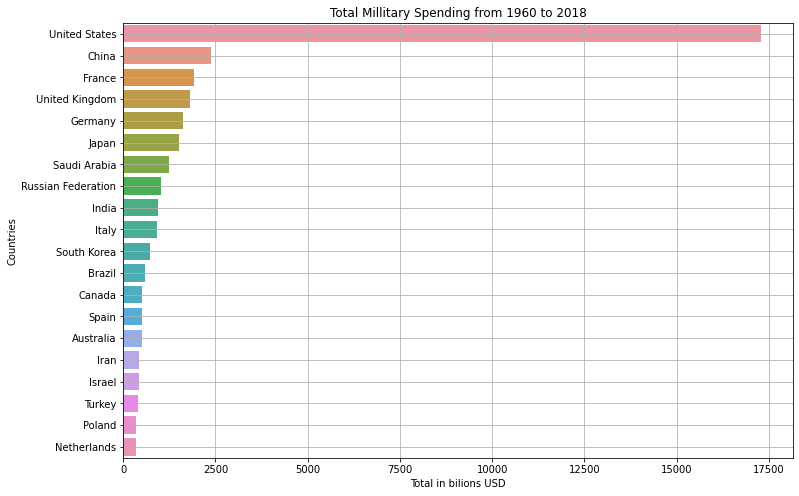

In [203]:
plt.figure(figsize=(12,8))
sns.barplot(x = 'Total', y = 'Name', data = df3)
plt.title('Total Millitary Spending from 1960 to 2018')
plt.xlabel('Total in bilions USD')
plt.ylabel('Countries')
plt.grid()

In [204]:
fig = px.pie(df2, values='Total', names='Name', title='Total military spendings in percentage from 1960 to 2018 ')
fig.show()

In [205]:
fig = px.pie(df2, values='1960', names='Name', title='Military spendings in percentage in 1960')
fig.show()

In [206]:
fig = px.scatter_geo(df2, locations="Code",hover_name="Name")
fig.update_layout(title="First 20 most powerful country")
fig.show()

In [207]:
fig = px.scatter_geo(df2, locations = 'Code',hover_name="Name",size = '2018')
fig.show()

In [0]:
df4 = df3.drop(['Total'], axis=1)

In [236]:
Top20 = df4.set_index('Name')
Top20.index = Top20.index.rename('Year')
Top20 = Top20.T
Top20.head(59)

Year,United States,China,France,United Kingdom,Germany,Japan,Saudi Arabia,Russian Federation,India,Italy,South Korea,Brazil,Canada,Spain,Australia,Iran,Israel,Turkey,Poland,Netherlands
1960,45.38,0.00,3.88,4.59,2.88,0.48,0.14,0.00,0.68,1.01,0.28,0.38,1.70,0.23,0.46,0.10,0.19,0.47,3.55,0.45
1961,47.81,0.00,4.13,4.75,3.27,0.49,0.07,0.00,0.75,1.06,0.16,0.34,1.68,0.24,0.47,0.11,0.24,0.30,4.03,0.55
1962,52.38,0.00,4.49,5.01,4.31,0.54,0.08,0.00,1.07,1.22,0.19,0.39,1.67,0.31,0.49,0.11,0.21,0.33,4.38,0.60
1963,52.30,0.00,4.63,5.20,4.98,0.63,0.11,0.00,1.80,1.46,0.19,0.44,1.61,0.32,0.55,0.13,0.26,0.35,4.95,0.64
1964,51.21,0.00,4.92,5.51,4.89,0.72,0.12,0.00,1.99,1.59,0.14,0.35,1.66,0.39,0.66,0.16,0.28,0.38,5.20,0.74
1965,51.83,0.00,5.12,5.79,4.98,0.82,0.18,0.00,2.13,1.72,0.13,0.63,1.57,0.44,0.79,0.20,0.31,0.42,5.52,0.75
1966,63.57,0.00,5.41,5.98,5.06,0.93,0.30,0.00,1.66,1.90,0.18,0.72,1.61,0.56,0.99,0.26,0.38,0.44,5.98,0.77
1967,75.45,0.00,5.86,6.20,5.35,1.04,0.34,0.00,1.49,1.93,0.22,0.75,1.78,0.55,1.20,0.33,0.61,0.51,6.28,0.88
1968,80.73,0.00,6.13,5.56,4.83,1.17,0.34,0.00,1.59,1.99,0.28,0.76,1.80,0.67,1.32,0.44,0.69,0.57,7.22,0.91
1969,81.44,0.00,5.91,5.54,5.47,1.34,0.43,0.00,1.69,2.00,0.35,0.82,1.77,0.81,1.31,0.57,0.87,0.60,7.98,1.02


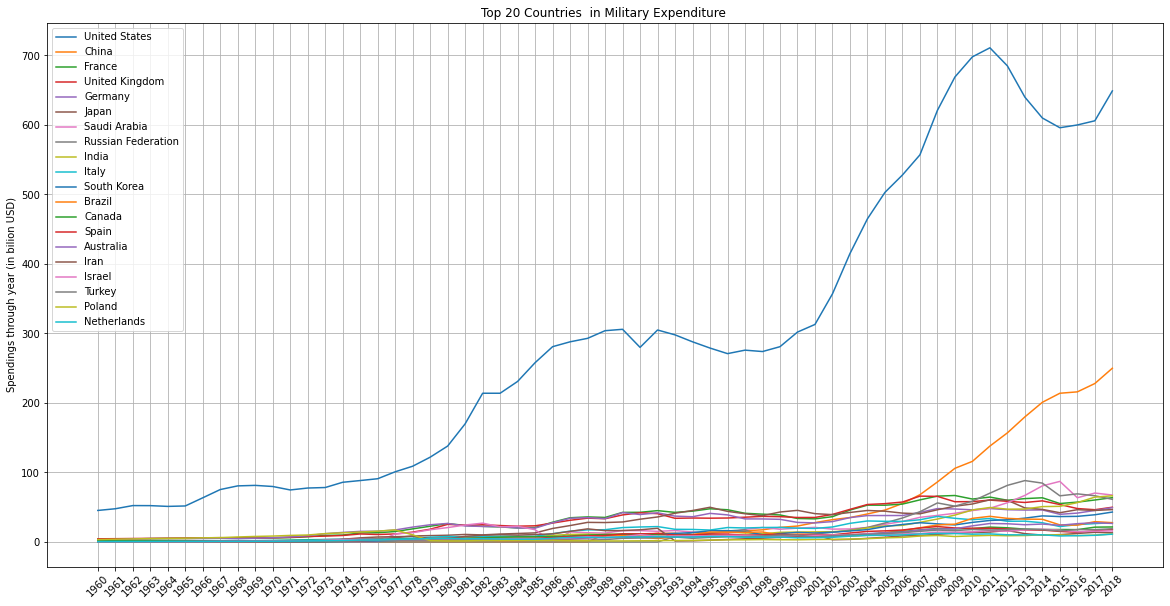

In [210]:
plt.figure(figsize=(20,10))
plt.plot(Top20.index, Top20.values)
plt.ylabel('Spendings through year (in bilion USD)')
plt.title('Top 20 Countries  in Military Expenditure ')
plt.xticks(rotation=45)
plt.legend(Top20.columns)
plt.grid(True)
plt.show()

In [0]:
PercUSA = (Top20['United States'].iloc[-1] - Top20['United States'].iloc[0])*100/Top20['United States'].iloc[0]
PercChina = (Top20['China'].iloc[-1] - Top20['China'].iloc[29])*100/Top20['China'].iloc[29]
PercRUS = (Top20['Russian Federation'].iloc[-1] - Top20['Russian Federation'].iloc[33])*100/Top20['Russian Federation'].iloc[33]
PercISR = (Top20['Israel'].iloc[-1] - Top20['Israel'].iloc[0])*100/Top20['Israel'].iloc[0]
PercITA = (Top20['Italy'].iloc[-1] - Top20['Italy'].iloc[0])*100/Top20['Italy'].iloc[0]
PercJPN = (Top20['Japan'].iloc[-1] - Top20['Japan'].iloc[0])*100/Top20['Japan'].iloc[0]
PercNET = (Top20['Netherlands'].iloc[-1] - Top20['Netherlands'].iloc[0])*100/Top20['Netherlands'].iloc[0]
PercPOL = (Top20['Poland'].iloc[-1] - Top20['Poland'].iloc[0])*100/Top20['Poland'].iloc[0]
PercSAU = (Top20['Saudi Arabia'].iloc[-1] - Top20['Saudi Arabia'].iloc[0])*100/Top20['Saudi Arabia'].iloc[0]
PercKOR = (Top20['South Korea'].iloc[-1] - Top20['South Korea'].iloc[0])*100/Top20['South Korea'].iloc[0]
PercSPA = (Top20['Spain'].iloc[-1] - Top20['Spain'].iloc[0])*100/Top20['Spain'].iloc[0]
PercTUR = (Top20['Turkey'].iloc[-1] - Top20['Turkey'].iloc[0])*100/Top20['Turkey'].iloc[0]
PercUK = (Top20['United Kingdom'].iloc[-1] - Top20['United Kingdom'].iloc[0])*100/Top20['United Kingdom'].iloc[0]
PercAUS = (Top20['Australia'].iloc[-1] - Top20['Australia'].iloc[0])*100/Top20['Australia'].iloc[0]
PercBRA = (Top20['Brazil'].iloc[-1] - Top20['Brazil'].iloc[0])*100/Top20['Brazil'].iloc[0]
PercCAN = (Top20['Canada'].iloc[-1] - Top20['Canada'].iloc[0])*100/Top20['Canada'].iloc[0]
PercFRA = (Top20['France'].iloc[-1] - Top20['France'].iloc[0])*100/Top20['France'].iloc[0]
PercGER = (Top20['Germany'].iloc[-1] - Top20['Germany'].iloc[0])*100/Top20['Germany'].iloc[0]
PercIND = (Top20['India'].iloc[-1] - Top20['India'].iloc[0])*100/Top20['India'].iloc[0]
PercIRA = (Top20['Iran'].iloc[-1] - Top20['Iran'].iloc[0])*100/Top20['Iran'].iloc[0]

In [0]:
data = [['United States', PercUSA], ['China', PercChina], ['Russian Federation', 14], ['Israel', PercISR], ['Italy', PercITA], ['Japan', PercJPN], ['Netherlands', PercNET], ['Poland', PercPOL], ['Saudi Arabia', PercSAU], ['South Korea', PercSAU], ['Spain', PercSPA], ['Turkey', PercTUR], ['United Kingdom', PercUK], ['Australia', PercAUS], ['Brazil', PercBRA], ['Canada', PercCAN], ['France', PercFRA], ['Germany', PercGER], ['India', PercIND], ['Iran', PercIRA]]

In [235]:
percdf= pd.DataFrame(data, columns=['Country', 'Percentage growth'])
percdf.head(20)

,Country,Percentage growth
0,United States,1330.145439
1,China,2092.982456
2,Russian Federation,14.000000
3,Israel,8294.736842
4,Italy,2653.465347
5,Japan,9612.500000
6,Netherlands,2397.777778
7,Poland,226.760563
8,Saudi Arabia,48150.000000
9,South Korea,48150.000000


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

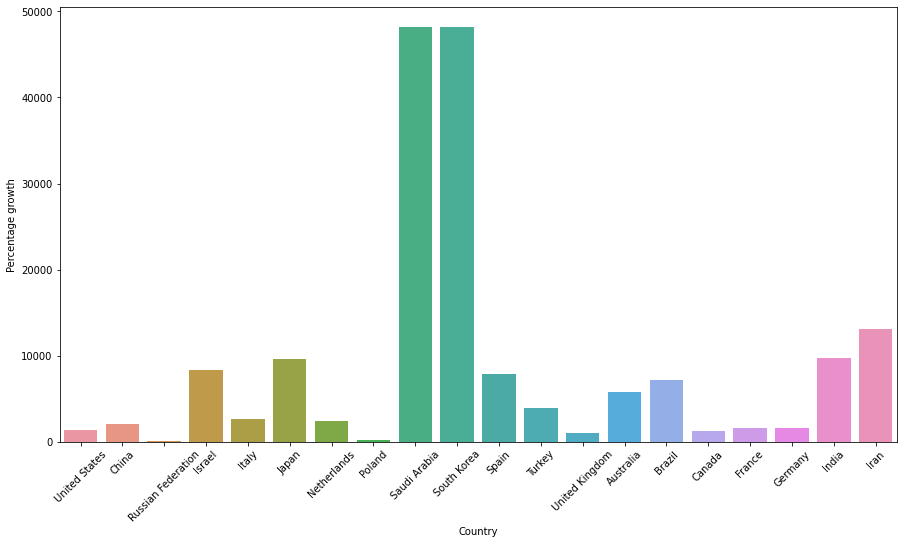

In [244]:
plt.figure(figsize=(15,8))
sns.barplot(x = 'Country', y = 'Percentage growth', data = percdf)
plt.xticks(rotation=45)